<a href="https://colab.research.google.com/github/muhammadnurarasy/muhammadnurarasy.github.io/blob/main/CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


170498071/170498071 [==============================] - 6s 0us/step


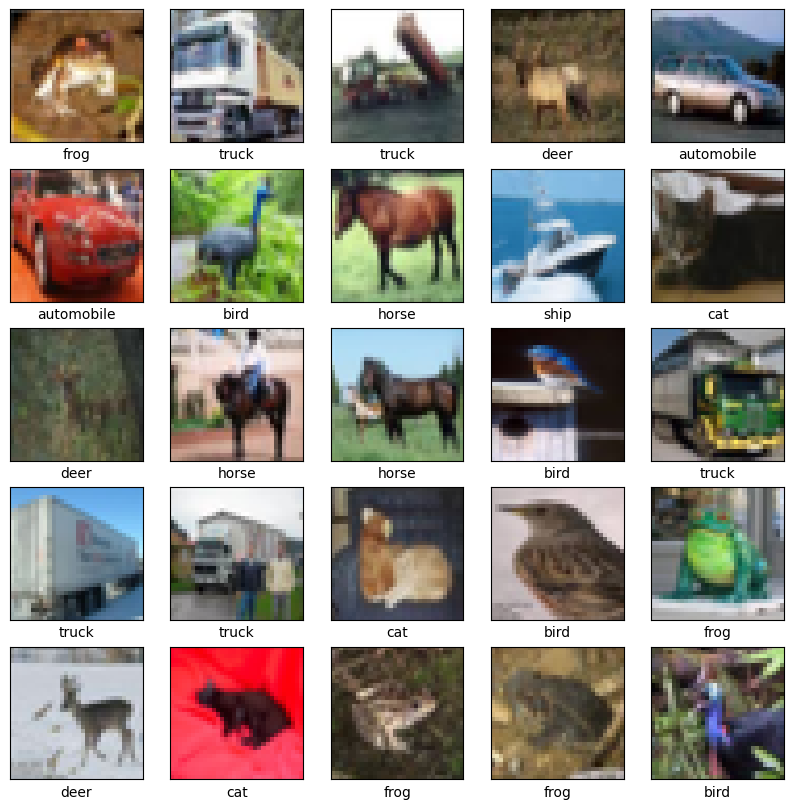

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Verify the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 90s 56ms/step - loss: 1.5411 - accuracy: 0.4379 - val_loss: 1.2940 - val_accuracy: 0.5323
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1680 - accuracy: 0.5864 - val_loss: 1.1097 - val_accuracy: 0.6085
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0055 - accuracy: 0.6454 - val_loss: 0.9922 - val_accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9114 - accuracy: 0.6821 - val_loss: 0.9393 - val_accuracy: 0.6754
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8323 - accuracy: 0.7108 - val_loss: 0.9078 - val_accuracy: 0.6808
Epoch 6/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7739 - accuracy: 0.7316 - val_loss: 0.8876 - val_accuracy: 0.6941
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7242 - accuracy: 0.7470 - val_loss: 0.8719 -

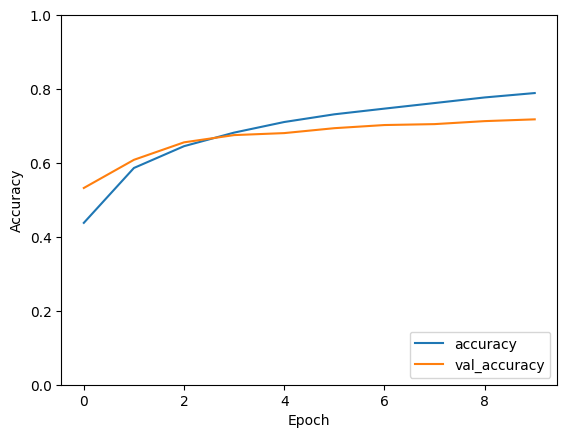

313/313 - 6s - loss: 0.8607 - accuracy: 0.7180 - 6s/epoch - 19ms/step
Test accuracy: 0.7179999947547913


In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


In [ ]:
# Save the model
model.save('cifar10_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/drive/MyDrive/Project/cifar10_cnn_model.h5')

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
def predict_image(image):
    # Preprocess the image to match the input shape expected by the model
    img_array = tf.image.resize(image, (32, 32))
    img_array = tf.expand_dims(img_array, 0)  # Create a batch axis

    # Make predictions
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Get the class with the highest prediction score
    predicted_class = class_names[np.argmax(score)]

    return predicted_class, 100 * np.max(score)


1/1 [==============================] - 0s 41ms/step


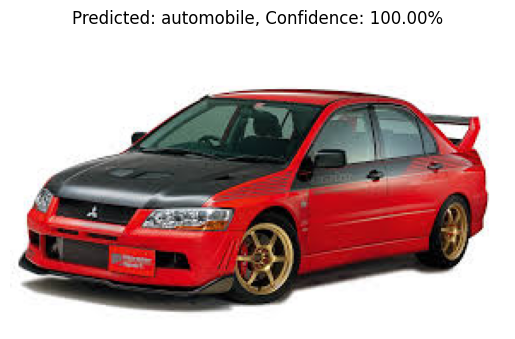

In [ ]:
def load_and_predict_image(image_path):
    # Load the image
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)

    # Predict the class
    predicted_class, confidence = predict_image(image)

    # Display the image and prediction
    plt.imshow(image.astype("uint8"))
    plt.title(f"Predicted: {predicted_class}, Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

# Example usage
load_and_predict_image('/content/drive/MyDrive/Project/images.jpg')
